# Milestone 2: Data collection and description

We split the exploration into different parts.

- [Broad analysis](#Approach)
- [Tags analysis](#Tags-Analysis)
- [Artists analysis](#Artists-Analysis)

First of all, we import libraries and fetch the data.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import os
import hdf5_getters3 as hdf5_getters
from scipy.interpolate import spline
from matplotlib.pyplot import cm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pprint import pprint
import folium
import re 
import math
from urllib.request import urlopen
import json
import time
from functools import partial  
%matplotlib inline

from IPython.display import display
# Allow to display html 
from IPython.core.display import display, HTML

In [2]:
# print line by line the elements of the list
def printList(liste):
    for elem in liste:
        print(elem)

#function to load and display saved maps 
def displaymap(url):
    iframe='<iframe src=' + url+ ' width=900 height=700></iframe>'
    display(HTML(iframe))


We parse the data and store all the relevant information we care about the metadata in a csv file. We will look at the following features: 
- title
- song_id
- artist_mbid
- artist_id
- artist_name
- artist_familiarity
- artist_similarity
- artist_latitude
- artist_longitude
- artist_mbtags
- artist_terms
- artist_hotttnesss
- danceability
- energy
- duration 
- key
- loudness
- song_hotttnesss
- tempo
- year

In [3]:
def create_csv():
    # The data frame we will store the data in
    df=pd.DataFrame(columns=['track_id','title','song_id','artist_mbid','artist_id','artist_name','artist_familiarity','artist_similarity',
                                        'artist_latitude','artist_longitude','artist_mbtags','artist_terms','artist_hotttnesss',
                                        'danceability','energy','duration','key','loudness','song_hotttnesss','tempo','year'])
    df=df.set_index('track_id')

    counter=0
    # We will cover each h5 files
    for (dirpath, dirnames, filenames) in os.walk("./data/MillionSongSubset/data"):
        for filename in filenames:
            if counter % 1000==0:
                print(str(int(counter/100))+"%")
            counter+=1
            # We extract the metadata we are interested in.
            h5 = hdf5_getters.open_h5_file_read(os.path.join(dirpath,filename))
            track_id = hdf5_getters.get_track_id(h5).decode()
            title = hdf5_getters.get_title(h5).decode()
            song_id = hdf5_getters.get_song_id(h5).decode()
            artist_id = hdf5_getters.get_artist_id(h5).decode()
            artist_mbid = hdf5_getters.get_artist_mbid(h5).decode()
            artist_name = hdf5_getters.get_artist_name(h5).decode()
            artist_familiarity = hdf5_getters.get_artist_familiarity(h5)
            artist_similarity = [item.decode() for item in hdf5_getters.get_similar_artists(h5)]
            artist_latitude = hdf5_getters.get_artist_latitude(h5)
            artist_longitude = hdf5_getters.get_artist_longitude(h5)
            artist_mbtags = [tag.decode() for tag in hdf5_getters.get_artist_mbtags(h5)]
            artist_hotttnesss = hdf5_getters.get_artist_hotttnesss(h5)
            artist_terms = [tag.decode() for tag in hdf5_getters.get_artist_terms(h5)]
            danceability = hdf5_getters.get_danceability(h5)
            energy = hdf5_getters.get_energy(h5)
            duration = hdf5_getters.get_duration(h5)
            key = hdf5_getters.get_key(h5)
            loudness = hdf5_getters.get_loudness(h5)
            song_hotttnesss = hdf5_getters.get_song_hotttnesss(h5)
            tempo = hdf5_getters.get_tempo(h5)
            year = hdf5_getters.get_year(h5)
            # We add the metadata to our dataframe
            df.loc[track_id]=[title,song_id,artist_mbid,artist_id,artist_name,artist_familiarity,
                                         artist_similarity, artist_latitude, artist_longitude, artist_mbtags,
                                         artist_terms,artist_hotttnesss,danceability,energy,duration, key, loudness,
                                         song_hotttnesss,tempo,year]
            h5.close()
    # We store the data to a csv file      
    df.to_csv('data/metadata.csv',encoding='utf-8')

In [4]:
df = pd.read_csv('data/metadata.csv',encoding='utf-8')

In [5]:
printList(df.columns)

track_id
title
song_id
artist_mbid
artist_id
artist_name
artist_familiarity
artist_similarity
artist_latitude
artist_longitude
artist_mbtags
artist_terms
artist_hotttnesss
danceability
energy
duration
key
loudness
song_hotttnesss
tempo
year


In [6]:
df.head()

,track_id,title,song_id,artist_mbid,artist_id,artist_name,artist_familiarity,artist_similarity,artist_latitude,artist_longitude,...,artist_terms,artist_hotttnesss,danceability,energy,duration,key,loudness,song_hotttnesss,tempo,year
0,TRAAAAW128F429D538,I Didn't Mean To,SOMZWCG12A8C13C480,e77e51a5-4761-45b3-9847-2051f811e366,ARD7TVE1187B99BFB1,Casual,0.581794,"['ARV4KO21187FB38008', 'ARWHM281187FB3D381', '...",NaN,NaN,...,"['hip hop', 'underground rap', 'g funk', 'alte...",0.401998,0.0,0.0,218.93179,1.0,-11.197,0.602120,92.198,0.0
1,TRAAABD128F429CF47,Soul Deep,SOCIWDW12A8C13D406,1c78ab62-db33-4433-8d0b-7c8dcf1849c2,ARMJAGH1187FB546F3,The Box Tops,0.630630,"['ARSZWK21187B9B26D7', 'ARLDW2Y1187B9B544F', '...",35.14968,-90.04892,...,"['blue-eyed soul', 'pop rock', 'blues-rock', '...",0.417500,0.0,0.0,148.03546,6.0,-9.843,NaN,121.274,1969.0
2,TRAAADZ128F9348C2E,Amor De Cabaret,SOXVLOJ12AB0189215,7a273984-edd9-4451-9c4d-39b38f05ebcd,ARKRRTF1187B9984DA,Sonora Santanera,0.487357,"['ARFSJUG11C8A421AAD', 'AR8SD041187FB36015', '...",NaN,NaN,...,"['salsa', 'cumbia', 'tejano', 'ranchera', 'lat...",0.343428,0.0,0.0,177.47546,8.0,-9.689,NaN,100.070,0.0
3,TRAAAEF128F4273421,Something Girls,SONHOTT12A8C13493C,e188a520-9cb7-4f73-a3d7-2f70c6538e92,AR7G5I41187FB4CE6C,Adam Ant,0.630382,"['AR4R0741187FB39AF2', 'AR0D7K21187B9AD14E', '...",NaN,NaN,...,"['pop rock', 'new wave', 'dance rock', 'rock',...",0.454231,0.0,0.0,233.40363,0.0,-9.013,NaN,119.293,1982.0
4,TRAAAFD128F92F423A,Face the Ashes,SOFSOCN12A8C143F5D,c6903a2e-063c-4f91-a284-17b8f421be7b,ARXR32B1187FB57099,Gob,0.651046,"['ARUA62A1187B99D9B0', 'ARHJFFY1187B98BA76', '...",NaN,NaN,...,"['pop punk', 'ska punk', 'breakcore', 'alterna...",0.401724,0.0,0.0,209.60608,2.0,-4.501,0.604501,129.738,2007.0


# Approach

Here we will explore the data in a broad way, by analyzing the distribution of our datasets against the years.   
Then we will observe the evolution of certain features that related to songs throughout the year.    
Finally, we will try to see the correlation between song and artist related features 

# Distribution of songs accross the year 

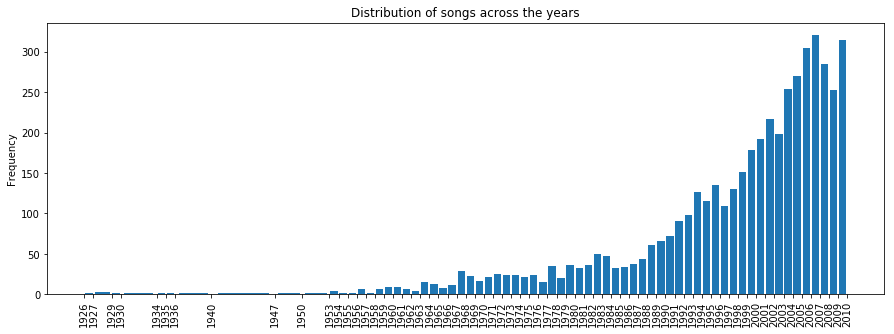

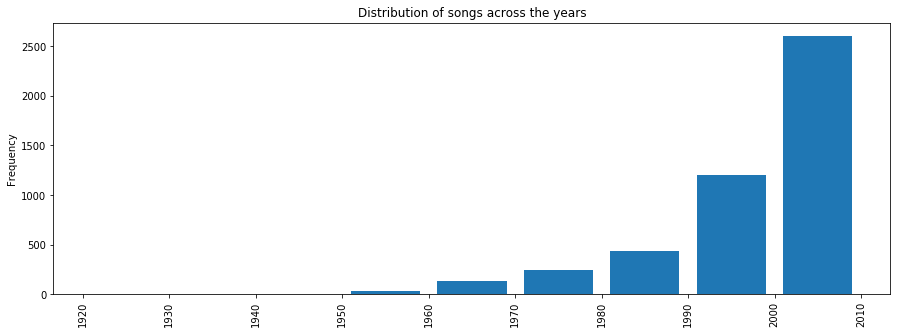

In [7]:
def plot_dist(dframe, name='years', unique_val=10):
    # Create figure and plot dataframe distribution without dist fitting
    fig,ax = plt.subplots(figsize=(15,5))
    dframe.plot.hist(by='year',bins = unique_val, rwidth=0.8)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_ticks(unique_val)
    plt.xticks(rotation=90)
    plt.title('Distribution of songs across the ' + name)


#remove zero values for year 
df_year = df['year'][df['year'] != 0]

#unique year values sorted: 
nb_year = sorted(df_year.unique())
plot_dist(df_year,'years', unique_val=nb_year)

# Extract for tens of year 
nb_year_tens = range(1920,2020,10)
# print(list(nb_year_tens))

# Plot distributions of songs for tens of years 
plot_dist(df_year, 'years', unique_val = nb_year_tens)

We observe that the songs are mainly distributed after the 2000's, and that before 1970's we have really few data. 
Thus we may want to limit our analysis between 1970 and 2010. 

# Distribution of artists across the world 

We want to display the distribution of artists across the world based on their coordinates. 

In [8]:
df_artist_coord = df[['artist_latitude', 'artist_longitude','artist_name']][df['artist_latitude'].notnull() & df['artist_longitude'].notnull()]
df_artist_coord.head()

,artist_latitude,artist_longitude,artist_name
1,35.14968,-90.04892,The Box Tops
10,35.21962,-80.01955,JennyAnyKind
15,43.64856,-79.38533,Blue Rodeo
16,37.16793,-95.84502,Richard Souther
20,34.31109,-94.02978,Jimmy Wakely


In [9]:
def create_map_artists():
    Lausanne = [46.519962, 6.633597]
    map = folium.Map(location=Lausanne, zoom_start=2 )
    loading = 0
    for index, row in df_artist_coord.iterrows():

        popup_text = re.escape(row['artist_name'])
    #     folium.Marker(location = [row['artist_latitude'], row['artist_longitude']],
    #                   popup = popup_text).add_to(map)
        folium.RegularPolygonMarker(location = [row['artist_latitude'], row['artist_longitude']],
            popup = popup_text,
            fill_color="#43d9de",
            radius = 5).add_to(map)

        loaded = loading/(len(df_artist_coord))*100
        if(loading%int(math.ceil(len(df_artist_coord)/10)) == 0):
            print(str(int(loaded)) + "%")
        loading += 1

    url_save = "./html/artists_map.html"
    map.save(url_save)
url_save = "./html/artists_map.html"
displaymap(url_save)

We can see that most of the artists are located in the US and in Europe. 

In [10]:
# Plotting functions 

def display_boxplot_year(df, feature):
    # create boxplots on the year axes according to one feature
    plt.subplots(figsize=(15,6))
    bplot = sns.boxplot(x='year', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feature+' for each year')
    plt.show()
    
def display_boxplot_year_no_outliers(df, feature):
    # create boxplots on the year axes according to one feature without outliers 
    plt.subplots(figsize=(15,6))
    bplot = sns.boxplot(x='year', y=feature, data=df,showfliers=False)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feature+' for each year')
    plt.show()
    
def display_scatterplot_year(df,feature):
    # create scatterplot on the year axes according to one feature
    plt.subplots(figsize=(15,6))
    bplot = sns.regplot(x='year', y=feature, data=df, fit_reg = False)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feature+' for each year')
    plt.show()
    
def extract_df_feature_year(df,feature):
    df_result = df[[feature, 'year']][(df['year'] != 0.0) & (df[feature] != 0.0) & (df[feature].notnull())]
    return df_result

# Basic features analysis against years 

## Aproach : 
For the feature analysis, we select some features from the datasets, then remove the one for which we don't have data, and finally plot their evolution against years. 

In [11]:
to_analyze_first = ['danceability', 'duration', 'energy','key', 'loudness', 'tempo', 'song_hotttnesss']

x_axis = ['year', 'genre']
printList(to_analyze_first)

danceability
duration
energy
key
loudness
tempo
song_hotttnesss


We want to know for which of the features we want to analyze, we have no data.   
We then construct a list of features for which we have data. 


In [12]:
to_analyze = []
for feat in to_analyze_first:
    if(df[feat][(df[feat] != 0) & (df[feat].notnull())].empty):
        print("no data for ", feat)
    else:
        to_analyze.append(feat)
        
print("\n\n" + 100*"*")
print("to analyze, new list : ")
print("\n")
printList(to_analyze)

no data for  danceability
no data for  energy


****************************************************************************************************
to analyze, new list : 


duration
key
loudness
tempo
song_hotttnesss


## Amount of data for each feature 

We will plot a bar plot to show how much data we have for each feature that is not NaN or 0. 


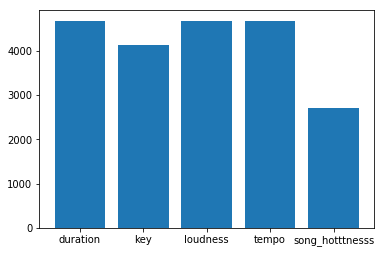

In [13]:
hist_data = {}

for feat in to_analyze:
    df_feat = extract_df_feature_year(df,feat)
    hist_data[feat] = len(df_feat)
    
fig, ax = plt.subplots()
plt.bar(range(len(hist_data)), hist_data.values(), align='center')
plt.xticks(range(len(hist_data)), hist_data.keys())
plt.show()


We observe that we have less data for song_hotttnesss but globally the data is substantial when we have it. 

## Song duration 

In [14]:
# Extract song duration and year and remove unknown values 
df_duration = extract_df_feature_year(df,'duration')
df_duration.head()

,duration,year
1,148.03546,1969.0
3,233.40363,1982.0
4,209.60608,2007.0
8,269.81832,1984.0
14,307.38240,1986.0


In [15]:
# Number of songs for which we have the duration 
len(df_duration)

4680

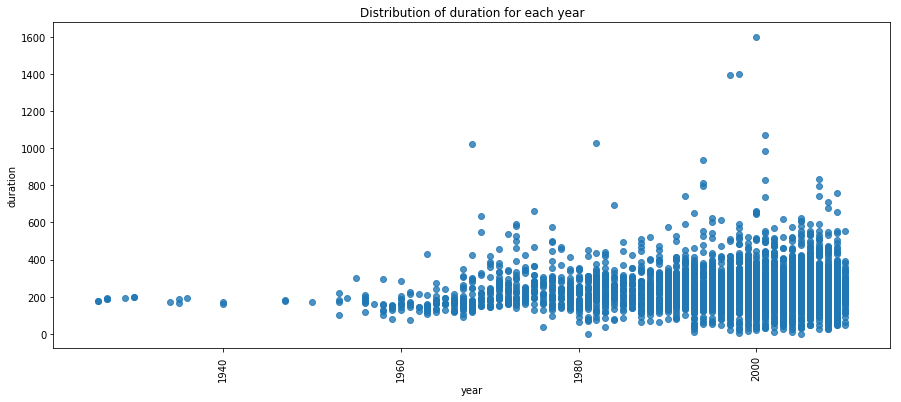

In [16]:
display_scatterplot_year(df_duration, 'duration')

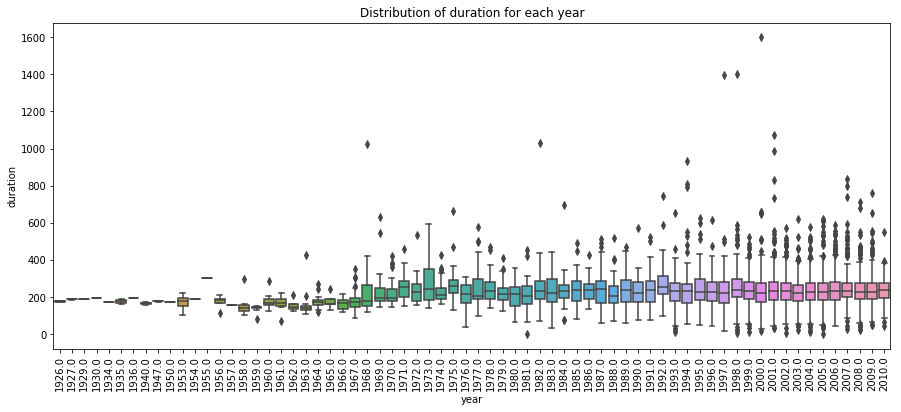

In [17]:
display_boxplot_year(df=df_duration, feature='duration')

We see that the outliers are big around years 1998 - 2002.     
We will not plot them in order to get a better understanding of the graph. 


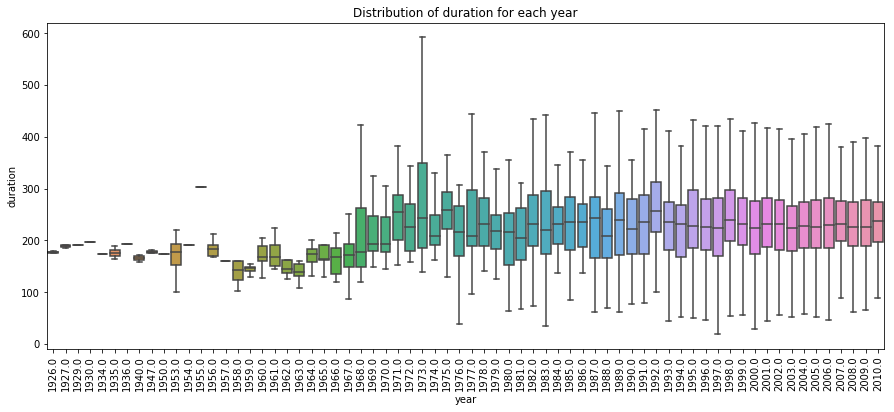

In [18]:
display_boxplot_year_no_outliers(df=df_duration, feature='duration')

We observe that there is a small evolution in song duration especially after 1968. 

## Song loudness 

In [19]:
df_loudness = extract_df_feature_year(df,'loudness')
df_loudness.head()

,loudness,year
1,-9.843,1969.0
3,-9.013,1982.0
4,-4.501,2007.0
8,-13.496,1984.0
14,-8.346,1986.0


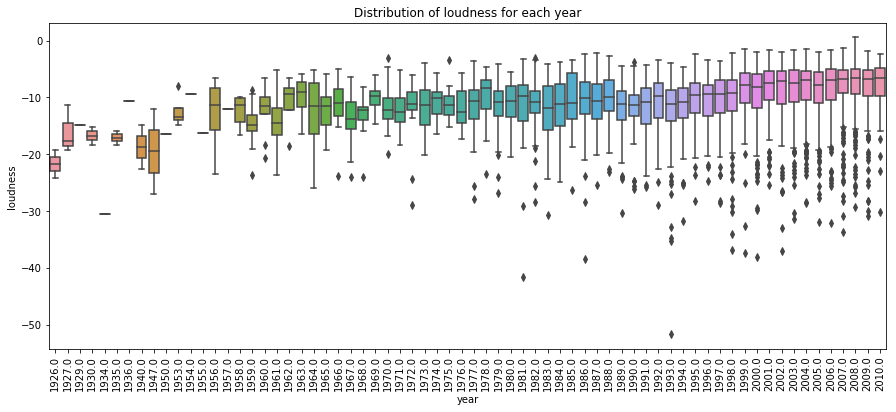

In [20]:
display_boxplot_year(df_loudness,'loudness')

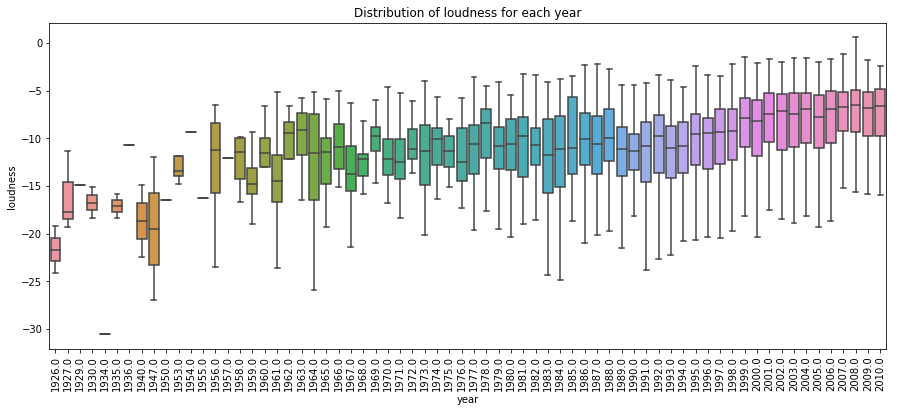

In [21]:
display_boxplot_year_no_outliers(df_loudness,'loudness')

We observe an increase of the loudness throughout the years. 


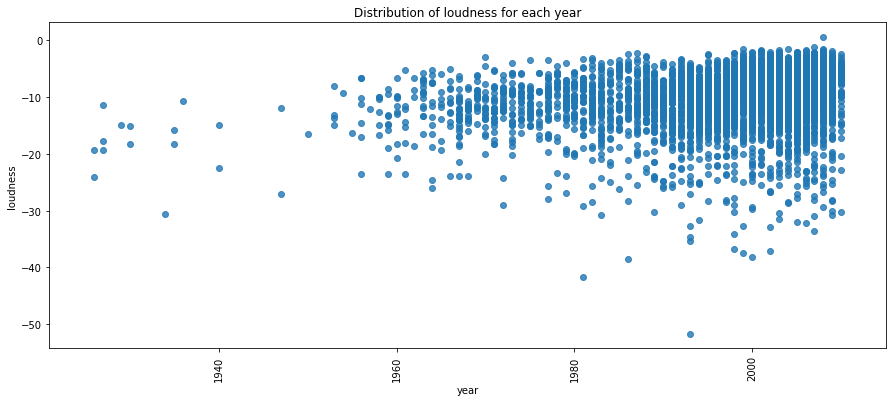

In [22]:
display_scatterplot_year(df_loudness,'loudness')

## Song Tempo

In [23]:
df_tempo = extract_df_feature_year(df, 'tempo')
df_tempo.head()

,tempo,year
1,121.274,1969.0
3,119.293,1982.0
4,129.738,2007.0
8,86.643,1984.0
14,125.197,1986.0


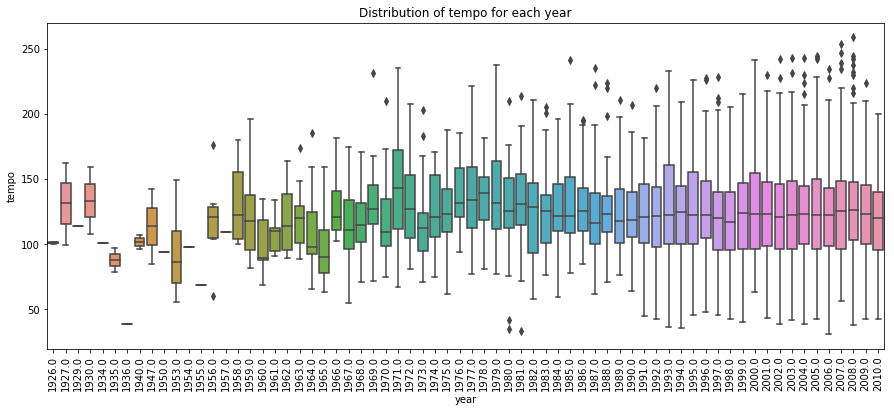

In [24]:
display_boxplot_year(df=df_tempo, feature='tempo')

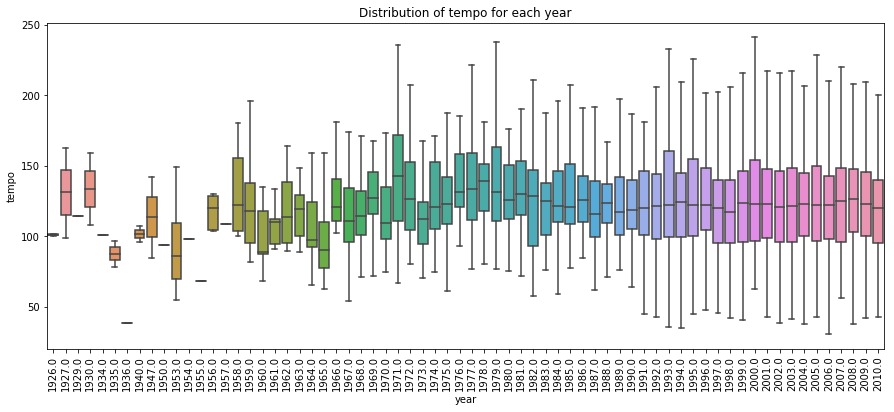

In [25]:
display_boxplot_year_no_outliers(df=df_tempo, feature='tempo')

The tempo seems to have had a small peak during the 70s before going back to normal.

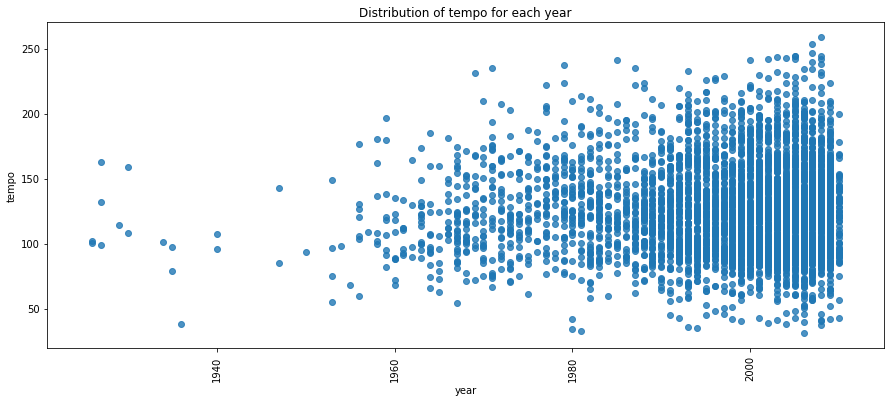

In [26]:
display_scatterplot_year(df_tempo, 'tempo')

## Song hotttnesss

In [27]:
df_hotness = extract_df_feature_year(df,'song_hotttnesss')
df_hotness.head()

,song_hotttnesss,year
4,0.604501,2007.0
8,0.265861,1984.0
15,0.405116,1987.0
18,0.684136,2004.0
23,0.666528,2004.0


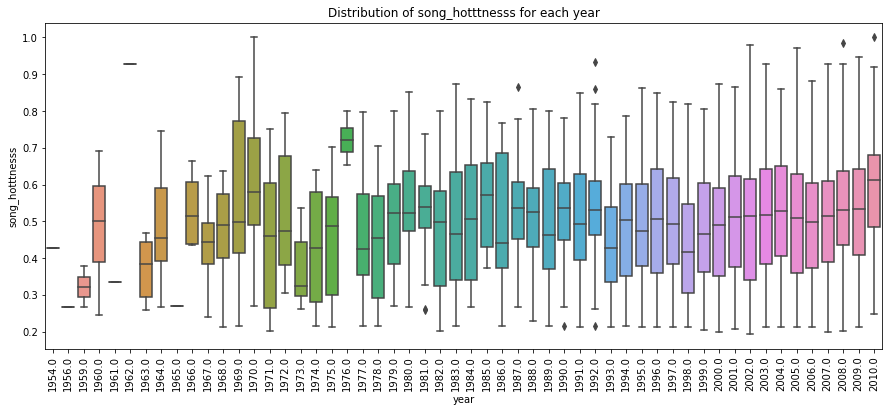

In [28]:
display_boxplot_year(df_hotness, 'song_hotttnesss')

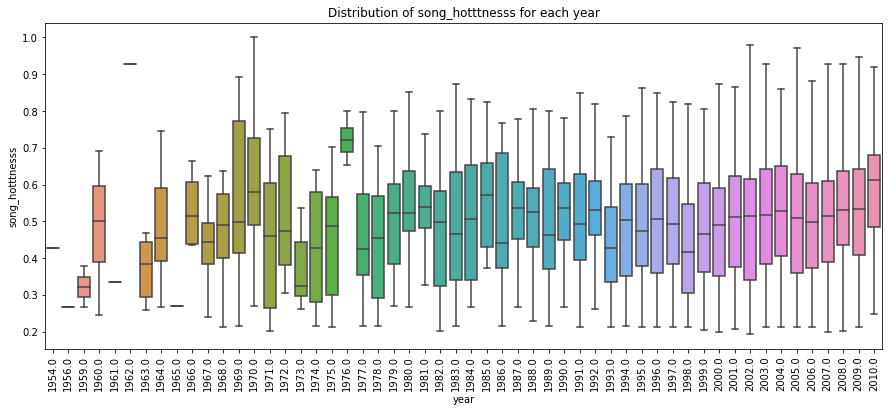

In [29]:
display_boxplot_year_no_outliers(df_hotness, 'song_hotttnesss')

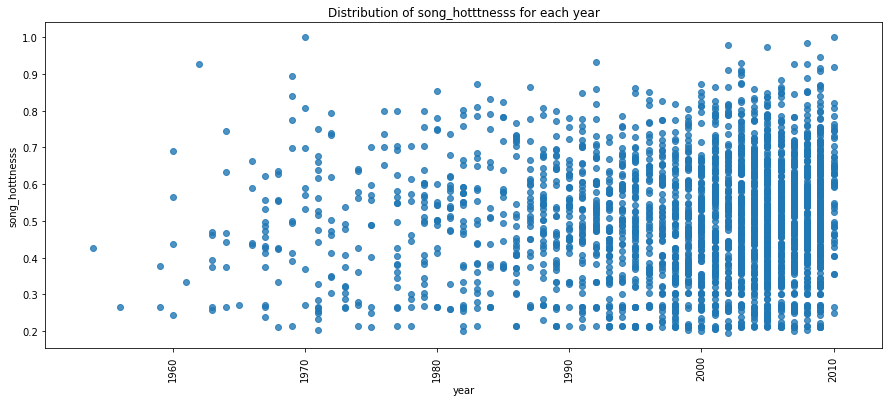

In [30]:
display_scatterplot_year(df_hotness, 'song_hotttnesss')

As the song_hotttnesss was defined when the dataset was created, it's normal that the most recent songs are more trendy, but what is interesting is that there seems to be someting going on around the 70s


# Correlations 


We want to observe the correlations between features. 

In [31]:
def extract_df_2_features(df,feat1, feat2):
    df_result = df[[feat1, feat2]][(df[feat2] != 0.0) & (df[feat1] != 0.0) & (df[feat1].notnull()) & (df[feat2].notnull())]
    return df_result

def display_scatterplot_features(df,feat1,feat2):
# create scatterplot on the year axes according to one feature
    plt.subplots(figsize=(15,6))
#     points = plt.scatter(df[feat1], df[feat2],c=df['song_hotttnesss'], cmap="BuGn")
    points = plt.scatter(df[feat1], df[feat2],color="#bcbddc")
    bplot = sns.regplot(x=feat1, y=feat2, data=df,color="#756bb1", scatter=False)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feat1 + ' against ' + feat2)
    plt.show()

In [32]:
correlation_first = ['danceability', 'duration', 'energy', 'loudness', 'tempo', 'song_hotttnesss','artist_familiarity',
              'artist_hotttnesss']

Again we want to remove the features for which we have no data :

In [33]:
correlation_analyze = []
for feat in correlation_first:
    if(df[feat][(df[feat] != 0) & (df[feat].notnull())].empty):
        print("no data for ", feat)
    else:
        correlation_analyze.append(feat)
        
print("\n\n" + 100*"*")
print("to analyze, new list : ")
print("\n")
printList(correlation_analyze)

no data for  danceability
no data for  energy


****************************************************************************************************
to analyze, new list : 


duration
loudness
tempo
song_hotttnesss
artist_familiarity
artist_hotttnesss


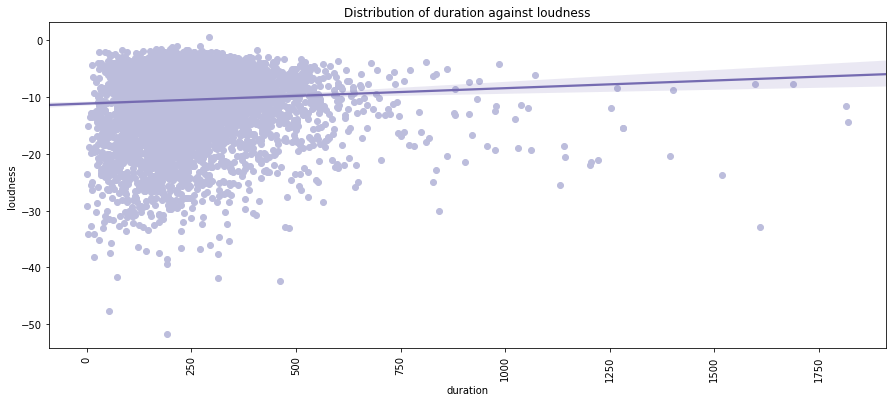

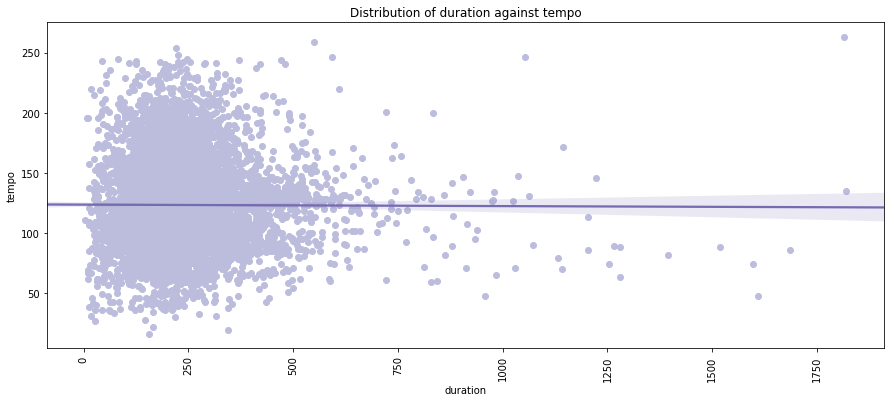

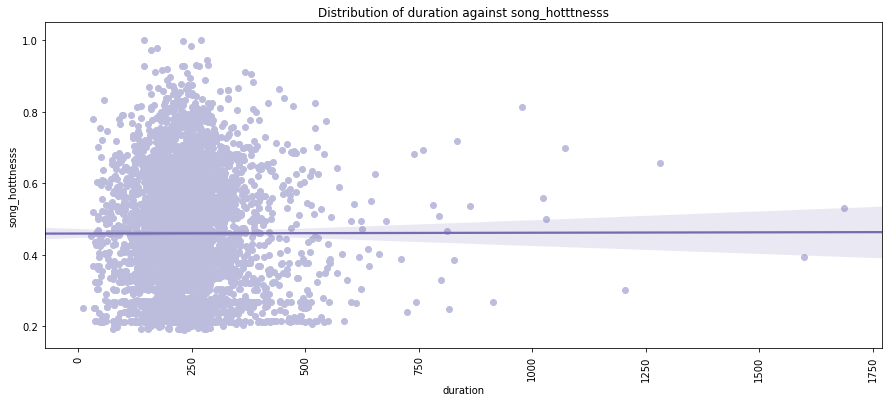

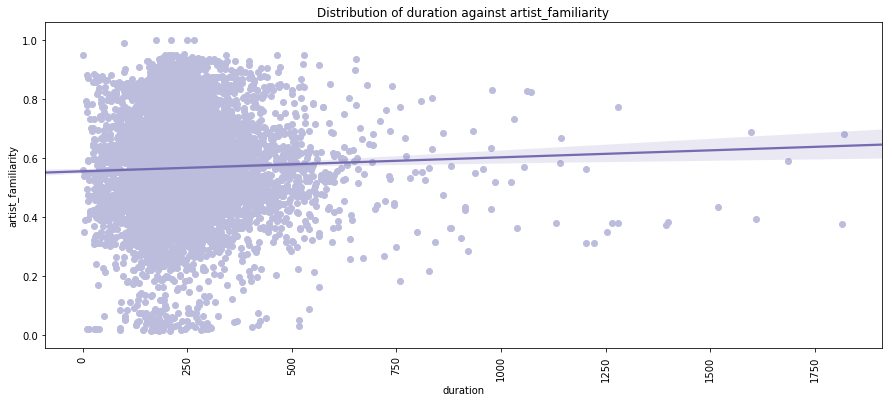

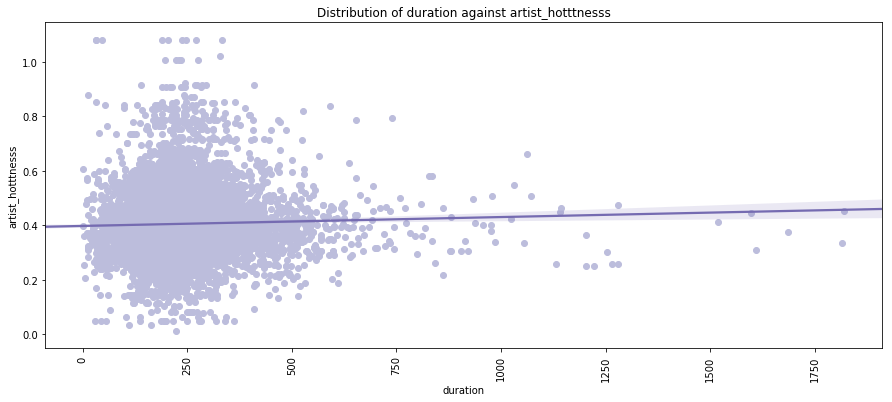

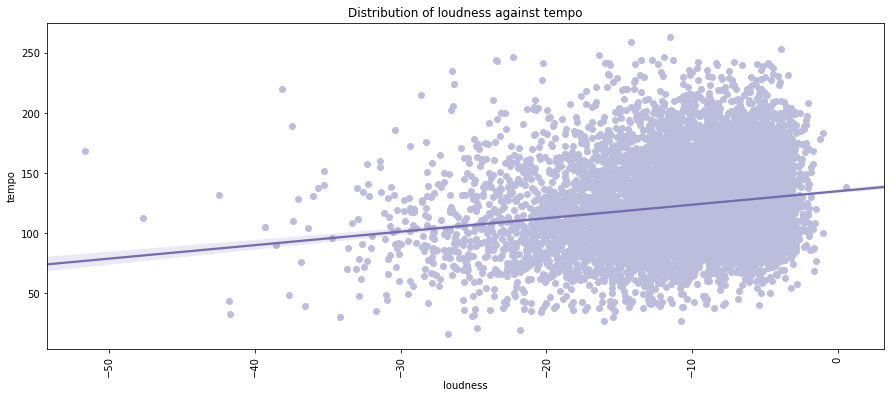

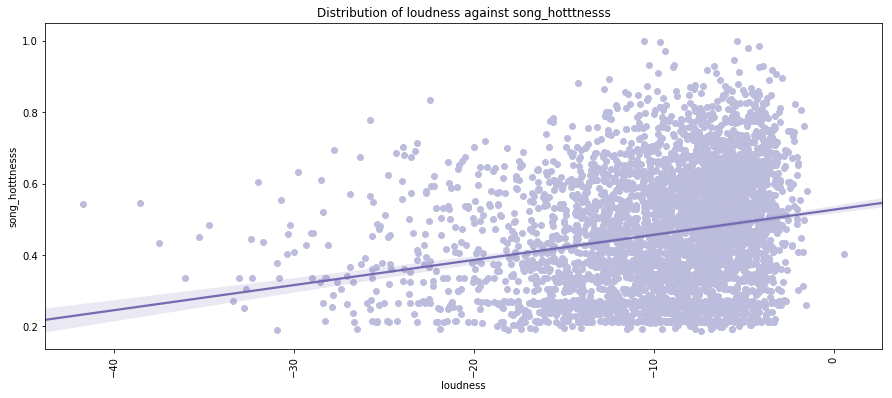

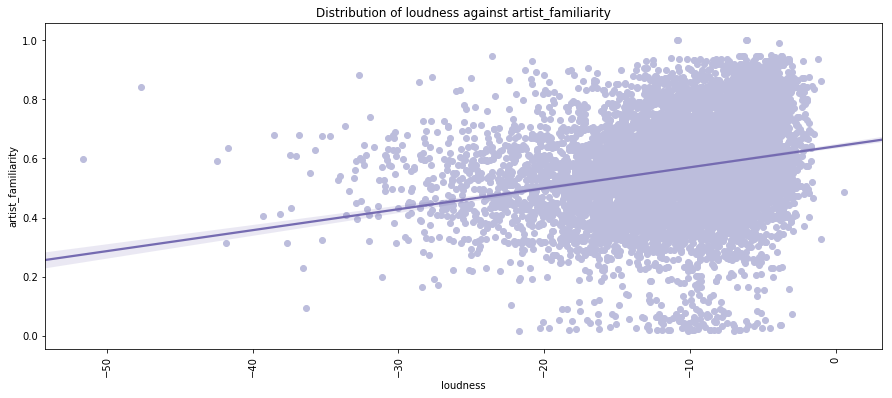

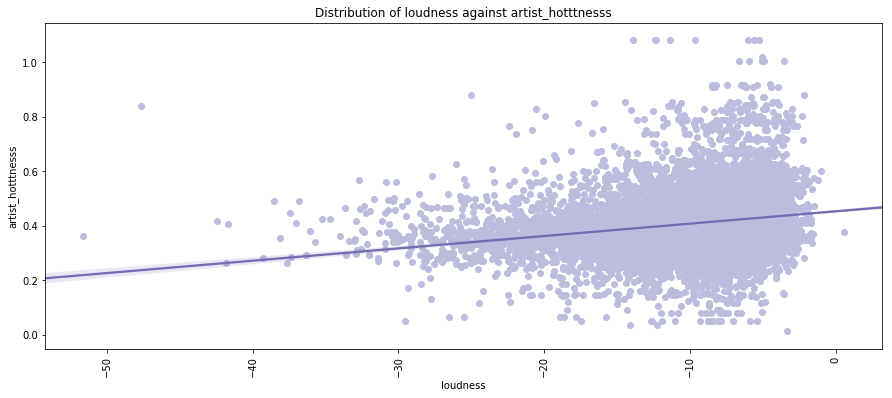

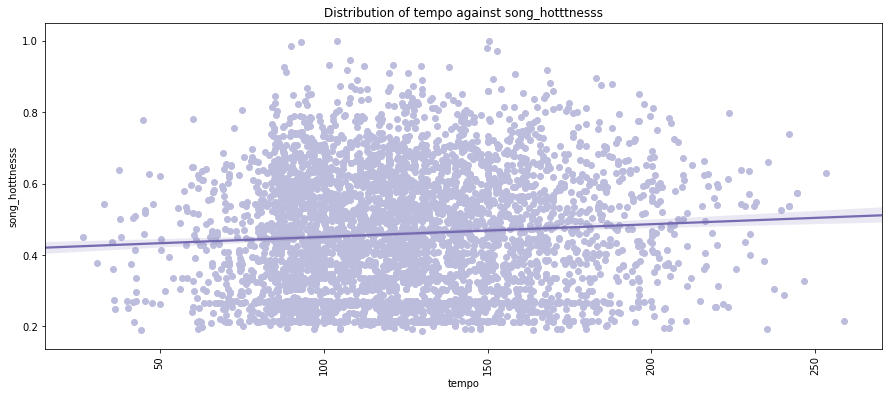

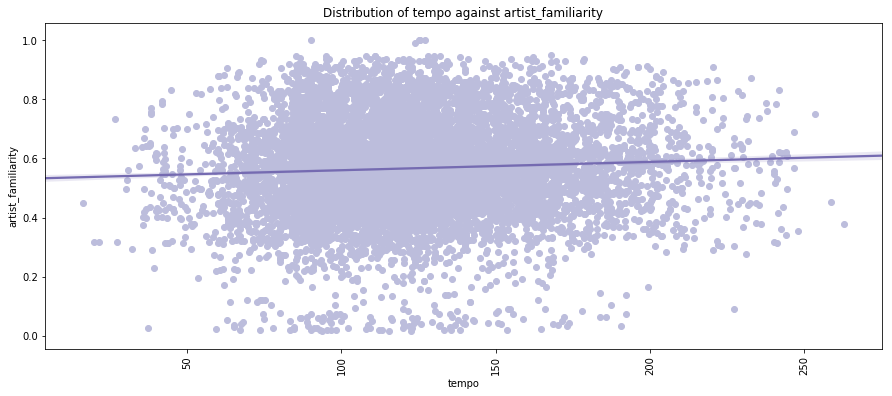

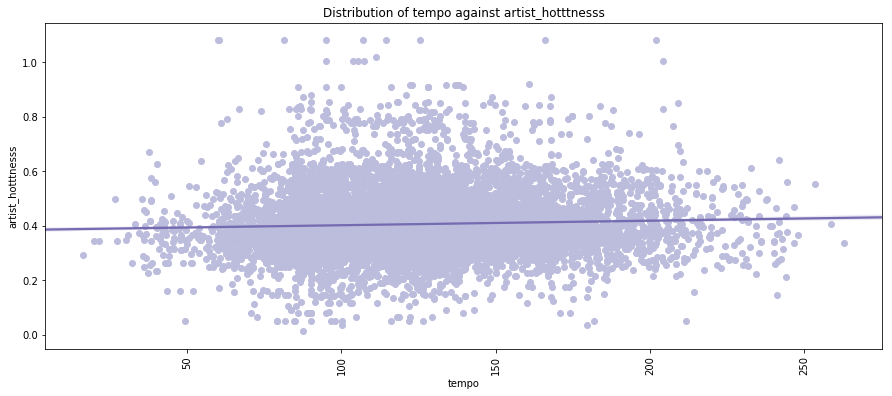

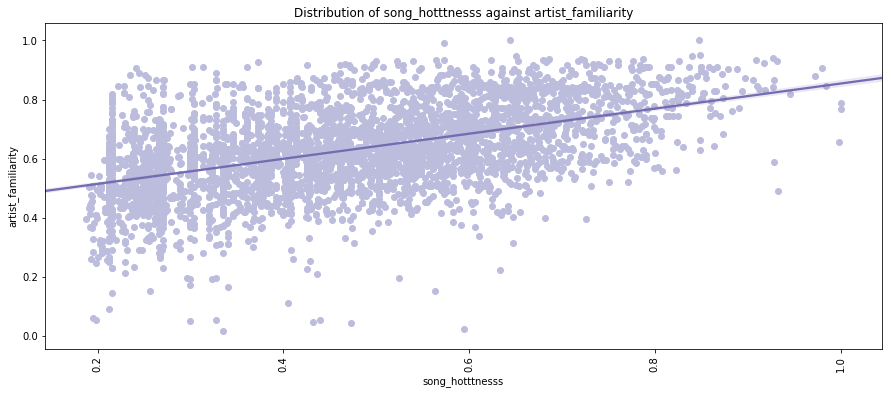

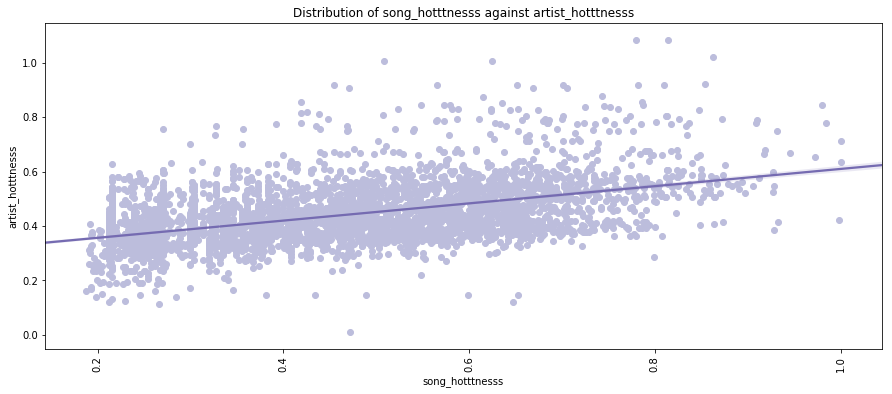

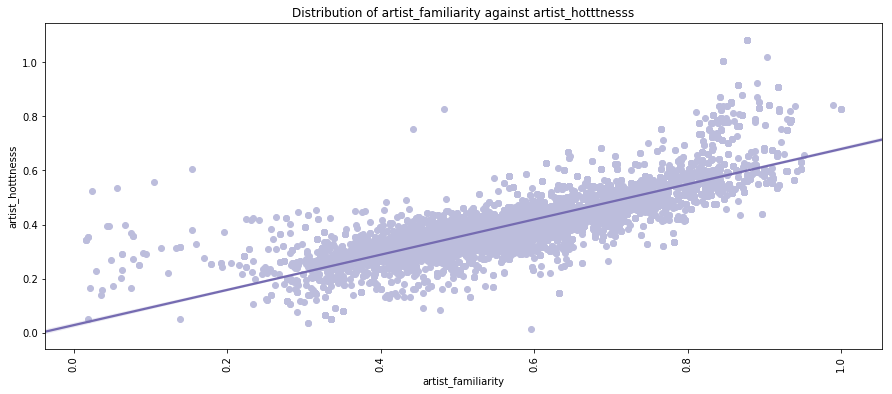

In [34]:
for i in range(0,len(correlation_analyze)):
    feat1 = correlation_analyze[i]
    for feat2 in correlation_analyze[i+1:]:
        if(feat2 not in feat1):
            # Extract features from dataframe where not null 
            df_analyze = extract_df_2_features(df,feat1,feat2)
            if(not df_analyze.empty):
                display_scatterplot_features(df_analyze, feat1, feat2)
            
 

The most striking correlation that we observe is between the artist_familiarity, the song_hotttnesss and the artist_hotttnesss which appear strongly correlated.  

It can be understood as a popular artist is most of the time popular by the songs he produces. 


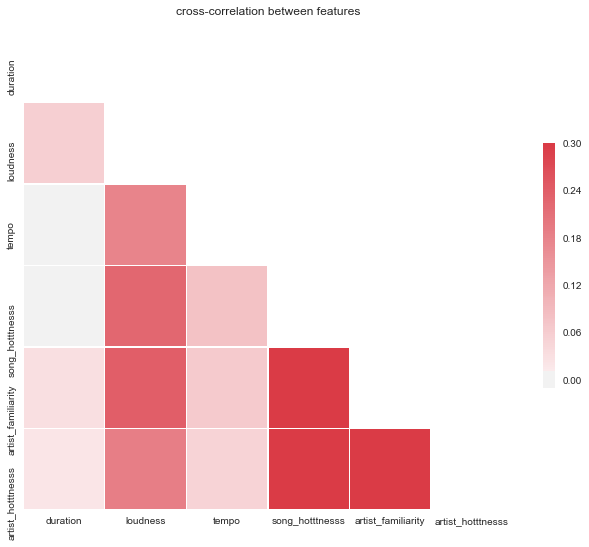

In [35]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[correlation_analyze].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('cross-correlation between features')
plt.show()

# Distribution of keys accross years 

In music theory, the key of a piece is the group of pitches, or scale that form the basis of a music composition in classical, Western art, and Western pop music.

The group features a tonic note and its corresponding chords, also called a tonic or tonic chord, which provides a subjective sense of arrival and rest, and also has a unique relationship to the other pitches of the same group, their corresponding chords, and pitches and chords outside the group. Notes and chords other than the tonic in a piece create varying degrees of tension, resolved when the tonic note or chord returns.

The key may be in the major or minor mode, though musicians assume major in a statement like, "This piece is in C." Popular songs are usually in a key, and so is classical music during the common practice period, around 1650–1900. Longer pieces in the classical repertoire may have sections in contrasting keys.

[source](https://tinyurl.com/yajv7t9u)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]


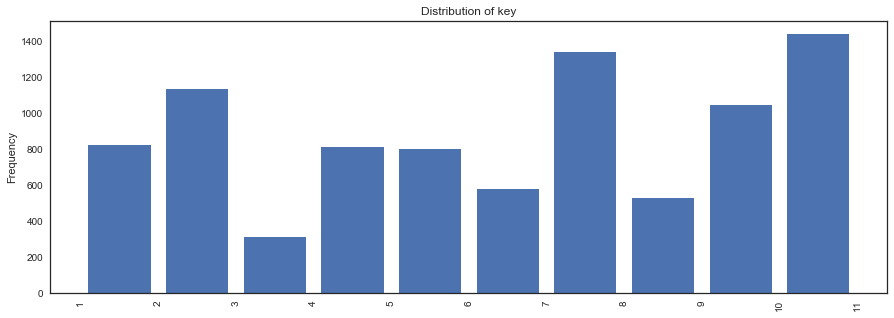

In [36]:
def plot_dist_feat(dframe,feat="key", unique_val=10):
    # Create figure and plot dataframe distribution without dist fitting
    fig,ax = plt.subplots(figsize=(15,5))
    dframe.plot.hist(by=feat,bins = unique_val, rwidth=0.8)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_ticks(unique_val)
    plt.xticks(rotation=90)
    plt.title('Distribution of ' + feat)

#remove zero values for year 
df_key = df['key'][df['key'] != 0]

#unique year values sorted: 
nb_key = sorted(df_key.unique())
print(nb_key)
plot_dist_feat(df_key,'key', unique_val = nb_key)

# Extract for tens of year 
nb_year_tens = range(1920,2020,10)

# print(list(nb_year_tens))

# Plot distributions of songs for tens of years 


In [37]:
df_key_year = extract_df_feature_year(df, 'key')
df_key_year.head()

,key,year
1,6.0,1969.0
4,2.0,2007.0
8,4.0,1984.0
14,3.0,1986.0
15,7.0,1987.0


In [38]:
year_list = sorted(df_key_year['year'].unique())
key_list = sorted(df_key_year['key'].unique())
stacked_key = {}
year_list
for year in year_list:
    df_key_year_redy = df_key_year[df_key_year['year'] == year]
    key_count_list = []
    for key in key_list:
        df_key_year_redy_redk = df_key_year_redy[df_key_year_redy['key'] == key]
        key_count_list.append(len(df_key_year_redy_redk))
    stacked_key[str(year)] = key_count_list
# stacked_key

In [39]:
year_list = sorted(df_key_year['year'].unique())
key_list = sorted(df_key_year['key'].unique())
stacked_year = {}
stacked_year_standardized={}
year_list
for key in key_list:
    df_key_year_redk = df_key_year[df_key_year['key'] == key]
    year_count_list = []
    year_count_list_standardized = []
    for year in year_list:
        df_key_year_redk_redy = df_key_year_redk[df_key_year_redk['year'] == year]
#         Not normalized
        year_count_list.append(len(df_key_year_redk_redy))
        #Standardized
        year_count_list_standardized.append(len(df_key_year_redk_redy)/len(df_key_year[df_key_year['year'] == year]))
    stacked_year[str(key)] = year_count_list
    stacked_year_standardized[str(key)] = year_count_list_standardized
    

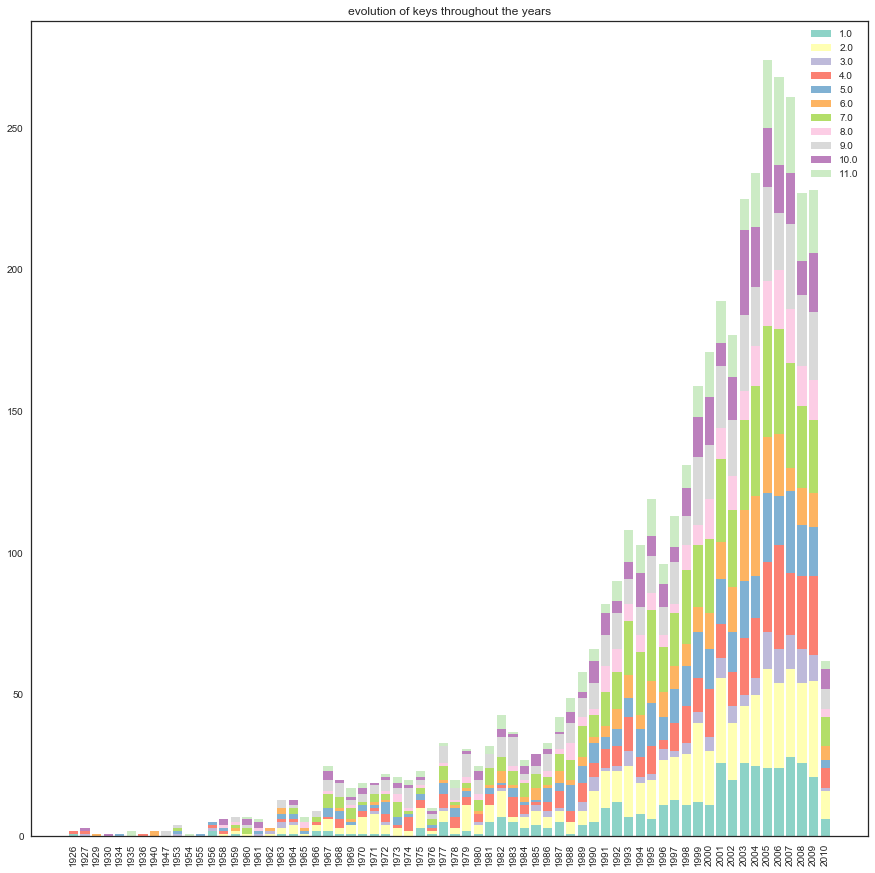

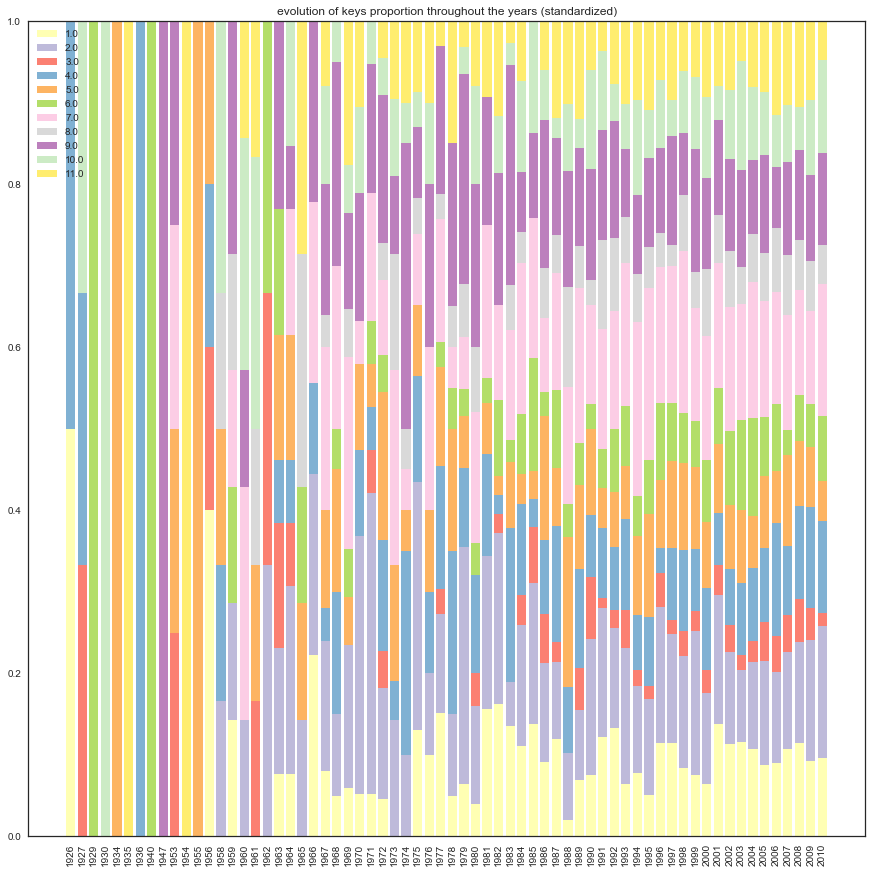

In [40]:
ind = np.arange(len(year_list))
year_list_int = [int(x) for x in year_list]
palette = sns.color_palette("Set3", n_colors=12, desat=1)

# Plot real values stacked
plt.subplots(figsize=(15,15))
width = 0.8
bottom_values = len(year_list)*[0]
for key in key_list:
    plt.bar(ind, stacked_year[str(key)], width, bottom = bottom_values,color= palette[int(key)-1])
    for idx,val in enumerate(stacked_year[str(key)]):
        bottom_values[idx] = bottom_values[idx] + val
plt.xticks(ind,year_list_int)
plt.xticks(rotation=90)
plt.legend(key_list)
plt.title('evolution of keys throughout the years')
plt.show()

# Plot standardized values stacked
plt.subplots(figsize=(15,15))
width = 0.8
bottom_values = len(year_list) * [0]
for key in key_list:
    plt.bar(ind, stacked_year_standardized[str(key)], width, bottom = bottom_values, color=palette[int(key)])
    for idx, val in enumerate(stacked_year_standardized[str(key)]):
        bottom_values[idx] = bottom_values[idx] + float(val)
plt.xticks(ind,year_list_int)
plt.xticks(rotation=90)
plt.legend(key_list)
plt.title('evolution of keys proportion throughout the years (standardized)')
plt.show()





We see that the globally most used key in songs is 7.0, and 3.0 doesn't seem to be used a lot, but there isn't a real predominant one.     


# Possible further analysis : 

- proportion of timbers 
- Get distribution of timbres against years 
- Evolution of correlation through time 
- correlation between tags and danceability ? 
- Link main with the genre. 
- Key accross the world

# Tags-Analysis

Let us now study in more details the tags of the songs

Let's observe the number of tags on average of a song

In [41]:
length_of_tags = df['artist_terms'].apply(lambda tags:len(eval(tags)))
length_of_tags.mean()

26.6611

Let's print the tags, sorted by frequency (only the first 20)

In [42]:
def get_tags_ordered_by_freq(tags,eval_=False):
    """
    Returns the unique tags in a dataframe and their count
    Put eval to true if the list of tags inside the dataframe is a string.
    """
    if eval_:
        flat_list = [item for sublist in tags for item in eval(sublist)]
    else:
        flat_list = [item for sublist in tags for item in sublist]
    tag_unique,count=(np.unique(flat_list,return_counts=True))
    return sorted(zip(tag_unique,count), key=lambda pair: pair[1])[::-1]
best_tags=get_tags_ordered_by_freq(list(df['artist_terms']),eval_=True)
pprint(best_tags[:20])

[('rock', 6493),
 ('pop', 5476),
 ('electronic', 4453),
 ('jazz', 3596),
 ('united states', 3084),
 ('hip hop', 2926),
 ('alternative rock', 2753),
 ('folk', 2598),
 ('alternative', 2586),
 ('soul', 2491),
 ('pop rock', 2324),
 ('blues', 2281),
 ('country', 2215),
 ('american', 2207),
 ('punk', 2182),
 ('indie', 2167),
 ('guitar', 2163),
 ('funk', 2008),
 ('classic rock', 1985),
 ('acoustic', 1942)]


Let's observe the distribution of the 20 most common tags

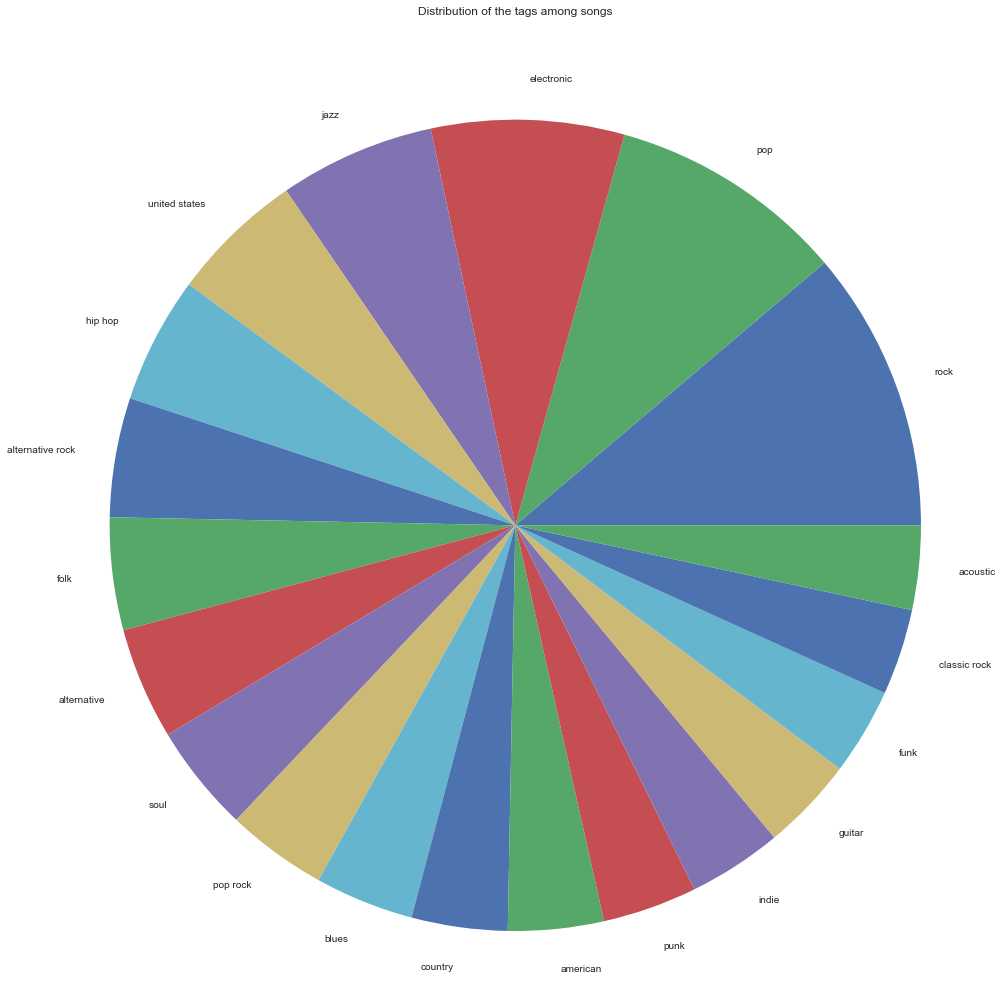

In [43]:
tags_toplot_selected=best_tags[:20]
#tags_toplot_others = best_tags[:20]
#tags_toplot_others = [c for _,c in tags_toplot_others]
#sum_others = np.sum(tags_toplot_others)
tags_toplot_selected_sizes = [c for _,c in tags_toplot_selected]
tags_toplot_selected_labels = [l for l,_ in tags_toplot_selected]
# Plotting
plt.figure(figsize=(16,16))
plt.pie(tags_toplot_selected_sizes, labels=tags_toplot_selected_labels)
plt.title('Distribution of the tags among songs',y=1.08)
plt.axis('equal')
plt.show()
plt.savefig('figs/most commong tags piechart.png')

As we can see, Rock is the most common tag, followed by pop and electronic.

Let's observe the evolution of the 5 most common tags throughout time

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


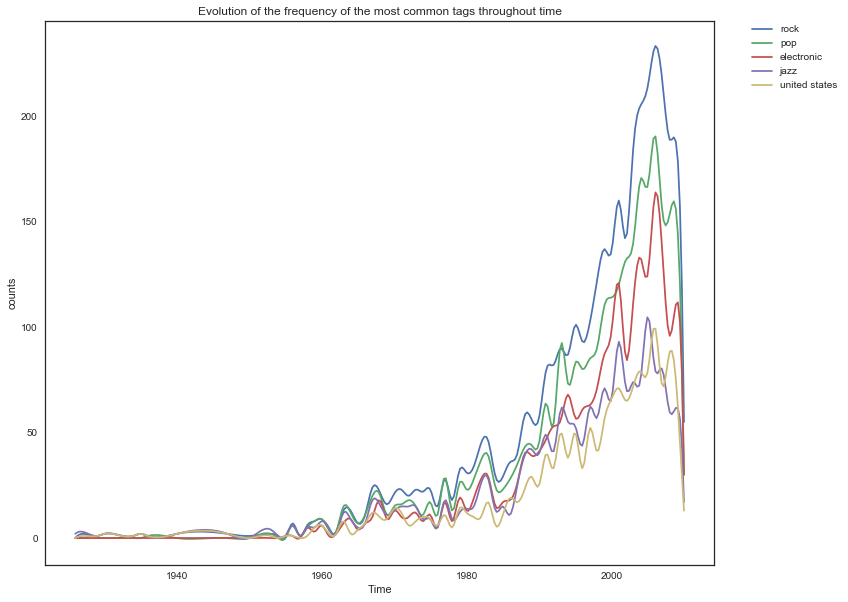

In [44]:
# Let's look at the data that is timestamped
df_per_year = df[df['year']!=0]
years=np.unique(df_per_year['year'])
# Tags we will plot (top 5)
tags_to_plot=best_tags[:5]
# Number frequency of each tag per year
counts_per_tag_per_year=[]
for tag,_ in tags_to_plot:
    counts_per_year =[]
    for year in years:
        count=0
        # Get the relevant year
        df_year = df_per_year[df_per_year['year']==year]
        # Get the tags ordered by frequency of the year we are looking at
        tags_ordered_by_freq = get_tags_ordered_by_freq(df_year['artist_terms'],eval_=True)
        for i in range(len(tags_ordered_by_freq)):
            # Add to the general cound of the top 5 tags, the frequency of these tags in this year
            if tags_ordered_by_freq[i][0]==tag:
                count=tags_ordered_by_freq[i][1]
                break
        counts_per_year.append(count)
    counts_per_tag_per_year.append(counts_per_year)
counts_per_tag_per_year

# Plotting
# To smooth the curve
xnew = np.linspace(years.min(),years.max(),300) 
plt.figure(figsize=(12,10))
# For each tag to plot, we plot it
for tag_idx in range(len(tags_to_plot)):
    counts_smooth = spline(years,counts_per_tag_per_year[tag_idx],xnew)
    plt.plot(xnew,counts_smooth,label=tags_to_plot[tag_idx][0])

plt.title("Evolution of the frequency of the most common tags throughout time")
plt.xlabel('Time')
plt.ylabel('counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig('figs/tags_plotted.png')

As we can see, the number of songs in the dataset increase as the song is more recent. As we can observe, overall, they seem to evolve at the same pace.



Let us now study each time period at a time and observe their most common tags with a stacked bar chart. To do that, since we will plot different most common tags for each time period, we need to separately build each reactangle of the plot.

c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


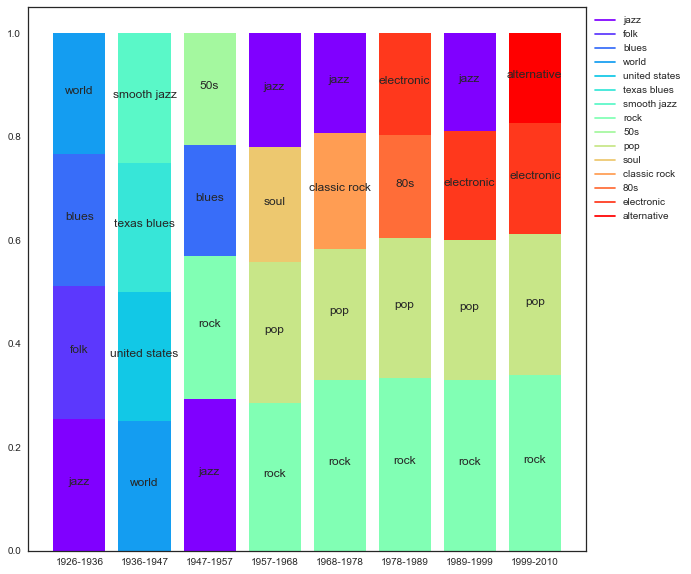

In [45]:
def get_windows_df(df_per_year,first_year,period_length,windows_number):
    """
    Split the data frame in windows_number dataframe, each corresponding to a time period
    """
    df_windows=[]
    for window_idx in range(windows_number):
        start_year = years[0]+window_idx*period_length
        end_year = start_year+period_length
        df_window = df_per_year[df_per_year['year']>= start_year ]
        df_window = df_window[df_window['year']< end_year]
        df_windows.append(df_window)
    return df_windows

# We want to study 8 time periods
windows_number = 8
# Length of a period in years
period_length = (years.max() - years.min())/windows_number
# The tags of a time period
tags_per_window=[]
#The colored assigned to a tag (one color per tag)
color_per_tag=dict()
# The colors generator
colors =iter(cm.rainbow(np.linspace(0,1,15)))
#The number of most common tags we will display per year
n_tags_to_keep=4


fig, ax = plt.subplots(figsize=(10,10))
# List of strings that represent the labels of x (the time periods)
time_periods=[str(int(years[0]+period_length*window_idx))+'-'+str(int(years[0]+(window_idx+1)*period_length)) for window_idx in range(windows_number)]

# Split the dataframe to get multiple dataframe, one for each time period
df_windows=get_windows_df(df_per_year,years[0],period_length,windows_number)

for window_idx in range(windows_number):
    df_window=df_windows[window_idx]
    # Get the most frequent tags
    most_frequent_tags = get_tags_ordered_by_freq(list(df_window['artist_terms']),eval_=True)[:n_tags_to_keep]
    tags_per_window.append(most_frequent_tags)
    
    # Normalize the counts
    counts=[]
    tags=[]
    for t,c in most_frequent_tags:
        counts.append(c)
        tags.append(t)
    normalized_counts = counts / sum(counts)
    
    # We will build a rectangle for each tag for each time period
    old_bar=[0]*windows_number
    for tag in range(0,len(tags)):
        # We create a bar that is zeros everywhere except where we want to put the rectangle.
        # (it's basically a bar plot, with a positive value only where we want a bar)
        # Since we work one time period at a time, we build one part of one bar at a time
        bar=[0]*window_idx
        bar.append(normalized_counts[tag])
        bar.extend([0]*(windows_number-1-window_idx))
        # We fetch the corresponding color for the tag
        if tags[tag] in color_per_tag.keys():
            color = color_per_tag[tags[tag]]
        else:
            color =next(colors)
            color_per_tag[tags[tag]]=color
        # We plot a part of the bar.
        # With an offset of the other parts of the current time period we have already displayed
        bar_plt = ax.bar(time_periods,bar,bottom=old_bar,color=color)
        # We add the text
        for rect in bar_plt:
            if rect.get_height()!=0:
                ax.text(rect.get_x() + rect.get_width()/2., rect.get_y()+rect.get_height()/2, tags[tag],ha='center')
        old_bar=np.array(bar)+np.array(old_bar)        
# We build the legend
for tag,color in color_per_tag.items():
    ax.plot([],[],label=tag,color=color)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    
fig.show()  
fig.savefig('figs/tags stacked bar.png')

As we can see the music tags have evolved through time. With songs in fol,jazz,blues in the 30s, we now have today music in rock, pop, electronic and alternative

### Maps  of tags

We will display the map of the different kind of music all over the world

Let us first get the country of each artists from the longitude and latitude. Instead of looking up the location of the artist of the location, we will only lookup once per artist.

In [46]:
# We first get the location of each artist
df_artists_location=pd.read_csv("data/MillionSongSubset/AdditionalFiles/subset_artist_location.txt" , 
                                sep="<SEP>", header=None, names=['AR','lat','long','TRA',"artist"])


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:


def getplace(lat, lon):
    """
    Return the country, given latitude and longitude
    """
    url = "http://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&sensor=false" % (lat, lon)
    components=None
    while(components==None):
        try:
            v = urlopen(url).read()
            j = json.loads(v) 
            components = j['results'][0]['address_components']
        except IndexError:
            print(lat,long)
            print("Retrying",j['status'])
            if j['status']=='ZERO_RESULTS':
                print("Doesn't exist...skipping...")
                return None
            time.sleep(0.5)
            continue
        except HTTPError:
            continue
    country = town = None
    for c in components:
        if "country" in c['types']:
            country = c['long_name']
        if "postal_town" in c['types']:
            town = c['long_name']
    return country
def map_of_tag_csv():
    # We find the country for each song
    df_artists_location['country']=[None]*df_artists_location.shape[0]
    for i in range(0,df_artists_location.shape[0]):
        lat=df_artists_location.loc[i,'lat']
        long=df_artists_location.loc[i,'long']
        print("N:",i,"/",df_artists_location.shape[0])
        place=getplace(lat,long)
        print(place)
        df_artists_location.loc[i,'country']=place

    df_artists_location.to_csv('data/df_artists_location.csv',encoding='utf-8')

In [48]:
df_artists_location=pd.read_csv('data/df_artists_location.csv',encoding='utf-8')

We display the repartition of songs' origin in the dataset over the world 

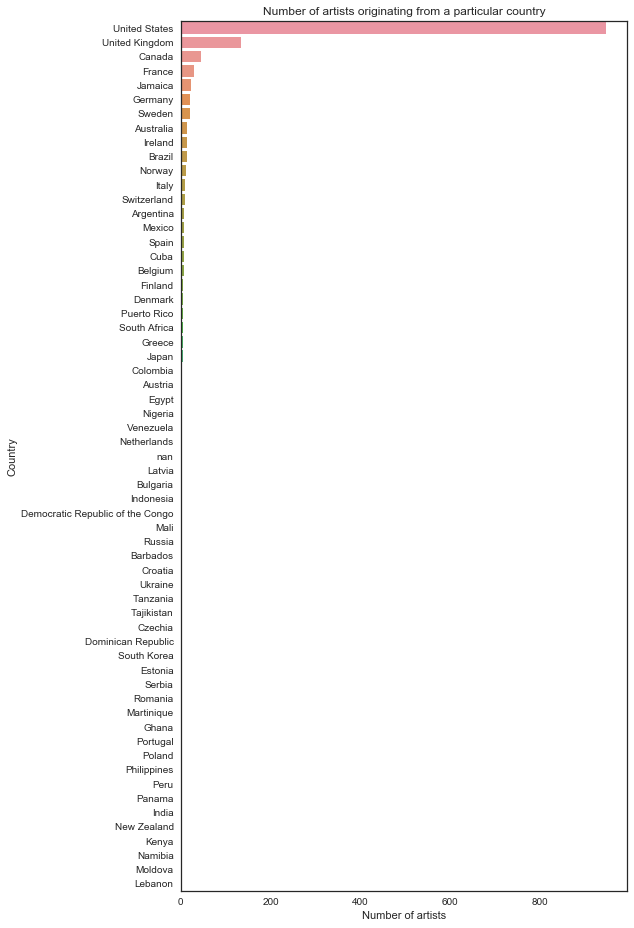

In [49]:
# Find the unique countries who are not none
countries_wo_None = [item for item in df_artists_location['country'] if item is not None]
uniq=np.unique(countries_wo_None,return_counts = True)
unique=np.array([uniq[0],uniq[1]]).T


df_country_count=pd.DataFrame(unique,columns=['Country','Count'])
df_country_count['Count']=df_country_count['Count'].astype('int64')
df_country_count=df_country_count.sort_values(by='Count',ascending=False)

f, ax = plt.subplots(1, 1,figsize=(8,16))
sns.barplot(y=df_country_count['Country'],x=df_country_count['Count'],ax=ax)
ax.set_title("Number of artists originating from a particular country")
ax.set_xlabel("Number of artists")
ax.set_ylabel("Country")
plt.show()
f.savefig("figs/musics per countries (subset).png")

In [50]:
# We merge this country information with the original dataset
df_to_merge=df_artists_location.loc[:,['AR','country']]
df_with_location = df.merge(df_to_merge,how='left',left_on='artist_id',right_on='AR').drop('AR',axis=1)
df_with_location.head()

,track_id,title,song_id,artist_mbid,artist_id,artist_name,artist_familiarity,artist_similarity,artist_latitude,artist_longitude,...,artist_hotttnesss,danceability,energy,duration,key,loudness,song_hotttnesss,tempo,year,country
0,TRAAAAW128F429D538,I Didn't Mean To,SOMZWCG12A8C13C480,e77e51a5-4761-45b3-9847-2051f811e366,ARD7TVE1187B99BFB1,Casual,0.581794,"['ARV4KO21187FB38008', 'ARWHM281187FB3D381', '...",NaN,NaN,...,0.401998,0.0,0.0,218.93179,1.0,-11.197,0.602120,92.198,0.0,NaN
1,TRAAABD128F429CF47,Soul Deep,SOCIWDW12A8C13D406,1c78ab62-db33-4433-8d0b-7c8dcf1849c2,ARMJAGH1187FB546F3,The Box Tops,0.630630,"['ARSZWK21187B9B26D7', 'ARLDW2Y1187B9B544F', '...",35.14968,-90.04892,...,0.417500,0.0,0.0,148.03546,6.0,-9.843,NaN,121.274,1969.0,United States
2,TRAAADZ128F9348C2E,Amor De Cabaret,SOXVLOJ12AB0189215,7a273984-edd9-4451-9c4d-39b38f05ebcd,ARKRRTF1187B9984DA,Sonora Santanera,0.487357,"['ARFSJUG11C8A421AAD', 'AR8SD041187FB36015', '...",NaN,NaN,...,0.343428,0.0,0.0,177.47546,8.0,-9.689,NaN,100.070,0.0,NaN
3,TRAAAEF128F4273421,Something Girls,SONHOTT12A8C13493C,e188a520-9cb7-4f73-a3d7-2f70c6538e92,AR7G5I41187FB4CE6C,Adam Ant,0.630382,"['AR4R0741187FB39AF2', 'AR0D7K21187B9AD14E', '...",NaN,NaN,...,0.454231,0.0,0.0,233.40363,0.0,-9.013,NaN,119.293,1982.0,NaN
4,TRAAAFD128F92F423A,Face the Ashes,SOFSOCN12A8C143F5D,c6903a2e-063c-4f91-a284-17b8f421be7b,ARXR32B1187FB57099,Gob,0.651046,"['ARUA62A1187B99D9B0', 'ARHJFFY1187B98BA76', '...",NaN,NaN,...,0.401724,0.0,0.0,209.60608,2.0,-4.501,0.604501,129.738,2007.0,NaN


We now display a map where each country is colored by the tag most common in its songs

c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


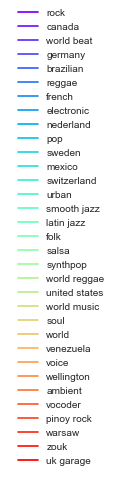

In [51]:
def create_map_tags_from_df(df_with_location):
    """
    Create a map from the dataframe coloring each country with the color of its most proeminent tag
    """
    best_tag_per_country = dict()
    color_per_country = dict()
    color_per_tag=dict()
    most_frequent_tags=[]
    
    # We will look at the songs which have a location
    countries=pd.unique(df_with_location['country'].dropna())
    for country in countries:
        df_country = df_with_location[df_with_location['country'] == country]
        # Get the most frequent tag
        most_frequent_tag,_=get_tags_ordered_by_freq(list(df_country['artist_terms']),eval_=True)[0]
        best_tag_per_country[country] = most_frequent_tag
        most_frequent_tags.append(most_frequent_tag)
    # Create the color generator
    colors =iter(cm.rainbow(np.linspace(0,1,np.unique(most_frequent_tags).shape[0])))
    # for each country, assigne its color based on its most common tag
    for country in countries:
        most_frequent_tag = best_tag_per_country[country]
        if not (most_frequent_tag in color_per_tag.keys()):
            color_per_tag[most_frequent_tag]=next(colors)
        color_per_country[country]=color_per_tag[most_frequent_tag]

    def RGBA_to_hex(argb):
        """
        function that translates RGBA to hex which is used in folium
        """
        hex_='#'
        for i in argb:
            hex_+=str(hex(int(i*255)).split('x')[-1].zfill(2))
        return hex_

    def style_function(feature, color_per_country_):
        """
        Style function for folium
        """
        key= feature['properties']['name']
        if key not in color_per_country_:
            fillcolor='#white'
        else:
            fillcolor=RGBA_to_hex(color_per_country_[key])
        return {'color':fillcolor}

    style_function_preped=partial(style_function,color_per_country_=color_per_country)

    # Load the geojson delimiting the countries
    countries_geo_path = 'data/world-countries.json'
    geo_json_data = folium.GeoJson(countries_geo_path,style_function=style_function_preped)
    Lausanne = [46.519962, 6.633597]
    world_map = folium.Map(location = Lausanne, tiles='cartodbpositron',zoom_start=2)
    geo_json_data.add_to(world_map)

    # Create a legend
    legend, ax = plt.subplots(figsize=(1,1))
    for tag_idx,tag in enumerate(color_per_tag):
        ax.plot([],[],color=color_per_tag[tag],label=tag)
    legend.legend()
    ax.axis('off')
    return world_map,legend

world_map, legend = create_map_tags_from_df(df_with_location)
legend.savefig("figs/legend_overall_map")
legend.show()
urlsave="./html/world_map_tags.html"
world_map.save(urlsave)
displaymap(urlsave)

We here have a map showing the most proeminent tags in each country. For example most of the songs from Switzerland have the tag french.

We will now look at how the maps looked like through out time:

1926-1954

1926-1954


c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


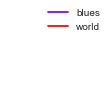

In [52]:
windows_number = 3
period_length = (years.max() - years.min())/windows_number
df_windows = get_windows_df(df_with_location, years[0],period_length,windows_number)
labels=[str(int(years[0]+period_length*window_idx))+'-'+str(int(years[0]+(window_idx+1)*period_length)) for window_idx in range(windows_number)]

print(labels[0])
world_map, legend = create_map_tags_from_df(df_windows[0])
legend.savefig("figs/legend_1926-1954.png")
legend.show()
urlsave="./html/world_map_tags_1926-1954.html"
world_map.save(urlsave)
displaymap(urlsave)

As we can see, we don't have a lot of songs so it's difficult to build a precise map

1954-1982

1954-1982


c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


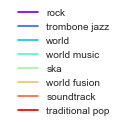

In [53]:
print(labels[1])
world_map, legend = create_map_tags_from_df(df_windows[1])
legend.savefig("figs/legend_1954-1982.png")
legend.show()
urlsave="./html/world_map_tags_1954-1982.html"
world_map.save(urlsave)
displaymap(urlsave)

Here we have more data, so it makes more sense

1982-2010

1982-2010


c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


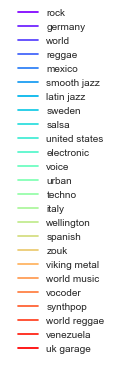

In [54]:
print(labels[2])
world_map, legend = create_map_tags_from_df(df_windows[2])
legend.savefig("figs/legend_1982-2010.png")
legend.show()
urlsave="./html/world_map_tags_1982-2010.html"
world_map.save(urlsave)
displaymap(urlsave)

Here we can clearly see a lot more countries because most of the songs in the dataset are recent

As we have seen, the popularity of tags evolved through time. We started with some blues and we are now listening to electronic music. We also that there is a lot of different ways kinds of music that are listened throughout the world.

It could be interesting to keep moving in this direction and maybe, with more data, we can fill more countries which could provide us with more insight.  
We plan on building a map that goes through time displaying the most popular tags in each country through time

# Artists-Analysis

In this section we will analyze artists over time, who are the hottest, the most familiar and those with the most influence. We will go through the following steps:

 - Analysis of *hotttnesss* vs *familiarity*
 - National artist hotness
 - Artist Similarity

## Analysis of *hotttnesss* vs *similarity*

First we would like to see how the hottness of artists evolves through time. 
> Note: We need to define what is hotness and familiarity
- According to [blog.echonest.com](blog.echonest.com), the buzz-measuring "hotttnesss" is telling "which songs are getting the most buzz – not just how they’re charting, or how many times they’ve been played, but how much people all over the world are talking about and sharing them.". It is very important to note that this buzz-metric has been calculated in **2010** so we do not necessarly have the information during the artist period. Hence this metric tells how people was seeing the artist in 2010.
  
We need to clean the data because there are a lot of artists with not *hotttnesss* and *year*. 

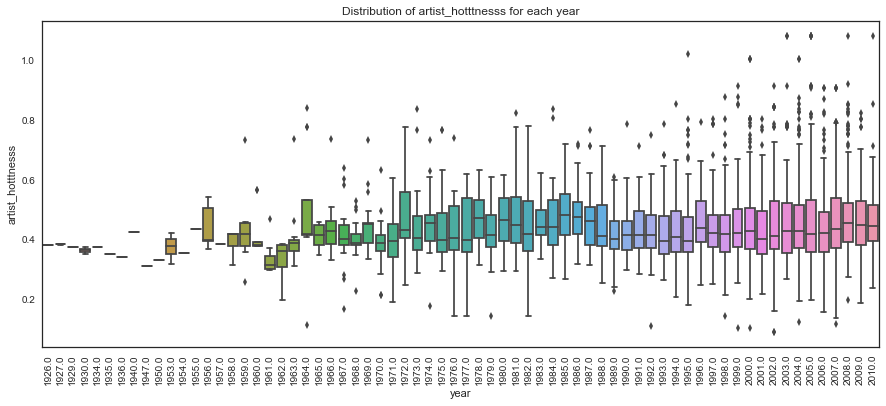

In [55]:
# Cleaning zeros in the data
df_nz = df[df['year'] != 0]
df_nz_hot = df_nz[df_nz['artist_hotttnesss'] != 0]
df_nz_fam = df_nz[df_nz['artist_familiarity'] != 0]

# Display the artist hotttnesss
display_boxplot_year(df=df_nz_hot, feature='artist_hotttnesss')

We do the same for the artist familiarity.
> Familiarity is also a measure from Echo Nest. It indicates how well known an artist is.

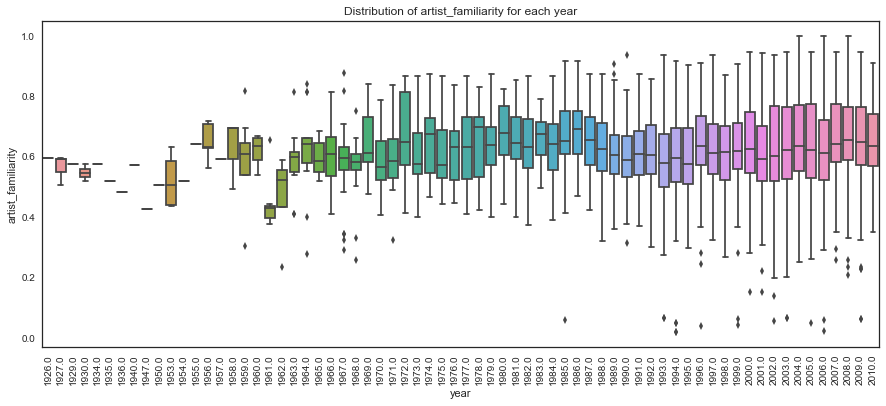

In [56]:
display_boxplot_year(df=df_nz_fam, feature='artist_familiarity')

We observe a correlation between the two features, they were overall indeed higher in the 80's and in the 21st century. This is however not obvious. We note a growth in the range of the distribution of both *hotttnesss* and *familiarity*.

### Who are the artists making the 'buzz' and the well known ones?

As the difference between those two features is not obvious, we will look at the top 10 artists with highest *hotttnesss* and *familiarity* across all years.

In [57]:
# Display the top 10 'hot' artists
df.sort_values(by='artist_hotttnesss', ascending=False).ix[:,['artist_name', 'artist_hotttnesss']] \
    .drop_duplicates(subset='artist_hotttnesss')[:10]

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,artist_name,artist_hotttnesss
8464,Kanye West,1.082503
4950,Daft Punk,1.021256
8123,Black Eyed Peas,1.005942
3886,Taylor Swift,0.922412
1972,Coldplay,0.916053
4219,Rihanna,0.908203
4014,Eminem,0.879237
9438,T.I.,0.872839
3326,Taylor Swift,0.872447
2873,Usher,0.854638


> Note: The three first artists have an *hotttnesss* score higher than 1 in contradiction as stated in the [description](https://labrosa.ee.columbia.edu/millionsong/pages/example-track-description) of the data. One hypothesis is that it comes from the featurings but since it does not affect our results we will not touch it.

In [58]:
# Display the top 10 'familiar' artists
df.sort_values(by='artist_familiarity', ascending=False).ix[:,['artist_name', 'artist_familiarity']]\
    .drop_duplicates(subset='artist_familiarity')[:10]

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,artist_name,artist_familiarity
7403,Akon,1.000000
9236,Lil Wayne,0.989939
5317,Paramore,0.951488
1237,Britney Spears,0.947328
1160,Avril Lavigne,0.941896
7581,Lady GaGa,0.939227
1917,Fall Out Boy,0.937965
8753,Mariah Carey,0.934935
9370,Alicia Keys,0.933916
6059,Muse,0.929030


From this two top 10, we can see that no artist is in both list. This shows that an artist that is well known is not necessarly doing a 'buzz'. We have to keep in mind that those two rankings are coming from 2010.

### Who are the hottest artists accross the years?

We will now focus on the top artists through years.

In [59]:
# Fetch the hottest artists in a dataframe
df_hottest_year = df_nz.sort_values(by=['year', 'artist_hotttnesss'], ascending=[True, False]) \
    .ix[:, ['year','artist_name', 'artist_hotttnesss']].drop_duplicates(subset='year')

# Fetch the most familiar artists in a dataframe
df_fam_year = df_nz.sort_values(by=['year', 'artist_familiarity'], ascending=[True, False]) \
    .ix[:, ['year','artist_name', 'artist_familiarity']].drop_duplicates(subset='year')

df_year = df_hottest_year.merge(df_fam_year, on='year')
df_year.head(10)

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,year,artist_name_x,artist_hotttnesss,artist_name_y,artist_familiarity
0,1926.0,Blind Lemon Jefferson,0.382847,Blind Lemon Jefferson,0.594867
1,1927.0,Ma Rainey,0.385568,Blind Lemon Jefferson,0.594867
2,1929.0,Charley Patton,0.375594,Charley Patton,0.574300
3,1930.0,Charley Patton,0.375594,Charley Patton,0.574300
4,1934.0,Charlie Patton,0.375594,Charlie Patton,0.574300
5,1935.0,Sleepy John Estes,0.353036,Sleepy John Estes,0.519000
6,1936.0,Red Foley,0.342627,Red Foley,0.481704
7,1940.0,Bukka White,0.424488,Bukka White,0.572471
8,1947.0,Tex Williams,0.313648,Tex Williams,0.425883
9,1950.0,Percy Mayfield,0.333723,Percy Mayfield,0.505074


In [60]:
df_year.tail(10)

,year,artist_name_x,artist_hotttnesss,artist_name_y,artist_familiarity
58,2001.0,Shakira,0.804220,Avril Lavigne,0.941896
59,2002.0,Coldplay,0.916053,Mariah Carey,0.934935
60,2003.0,Kanye West,1.082503,Britney Spears,0.947328
61,2004.0,Black Eyed Peas,1.005942,Akon,1.000000
62,2005.0,Kanye West / Adam Levine,1.082503,Britney Spears,0.947328
63,2006.0,Rihanna,0.908203,Akon,1.000000
64,2007.0,Rihanna,0.908203,Britney Spears,0.947328
65,2008.0,Kanye West,1.082503,Akon,1.000000
66,2009.0,U2,0.825639,Britney Spears,0.947328
67,2010.0,Kanye West / Lupe Fiasco,1.082503,Daddy Yankee,0.908984


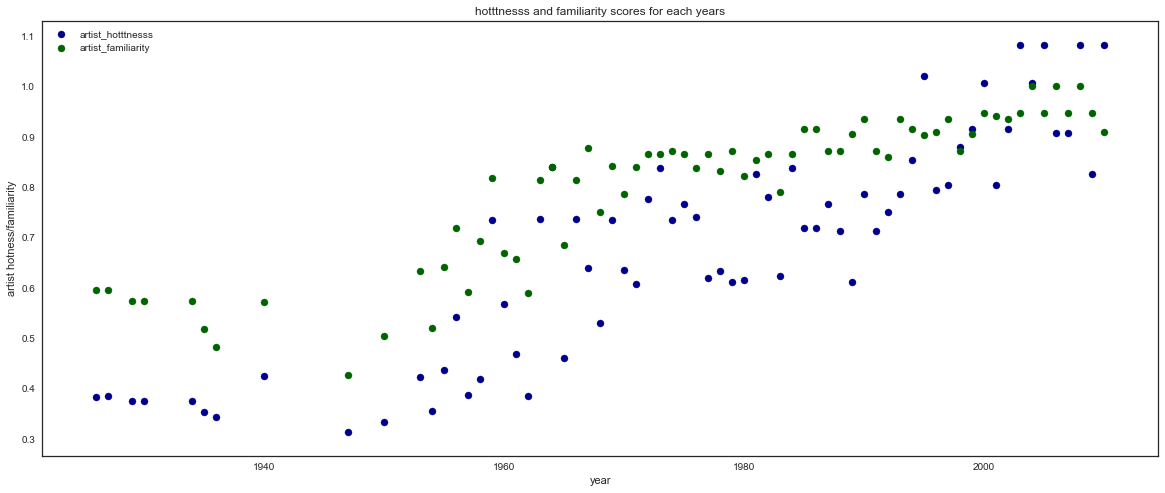

In [61]:
# Plot the hottest and most familiar artists
fig, ax = plt.subplots(figsize=(20,8))
df_hottest_year.plot('year', 'artist_hotttnesss', kind='scatter', s=50, ax=ax, label='artist_hotttnesss', color='DarkBlue')
df_fam_year.plot('year', 'artist_familiarity', kind='scatter', s=50, ax=ax, label='artist_familiarity', color='DarkGreen')
plt.ylabel('artist hotness/familiarity')
plt.title('hotttnesss and familiarity scores for each years')
plt.savefig('./figs/hot_fam_scores_year')
plt.show()

From this analysis we can see that some artists are both the *hottest* and *familiar*. However, we quickly see that they are different most of the time. So those two meeasures are definitely not the same even if they both grow in a same manner.   
  
Hot artists are Kanye West, U2, Black Eyed Peas, Rihanna... Whereas familiar artists are Akon, Britney Spears or Madonna. Some artists such as Eminem or Daft Punk are appearing in both lists but not the same years.

## National artists hotness

We now look at artists locations.
### Overall hoteness by country
Given that we have the location of artists we can compute the mean hoteness per country to see what country is buzzing the most. We would also like to display the name of the artist with the highest *hotttnesss* score for each country. This has all to be done on the topo json of the world map used in the tags analysis.

### Evolution through time
The goal here is to see the evolution from before in time. We will first have 5 different layers for the following years. We need to compute the man and the hottest score for the folowing years. We can then extend this using a spinner and present the entire data available.

### US hottenesss
As we can see on the distribution of artists per country, we have the most data in the US, it would be interesting to do the same analysis as above only with the states of the US. Is it hotter on coasts than lands?

## Artist Similarity

The aim here is to find the artists that influence the most the others. 

### Simple Analysis
In order to do so we will first simply look at the artist with the most influence by counting the number of artist that are similar to them.
  
We will first fetch the similar database in the additional file.

> Note: We already have a similarity entry, however it is for the tracks and not the artists

In [62]:
# Fetch the similarity data from the similarity .db
con = sqlite3.connect('./data/MillionSongSubset/AdditionalFiles/subset_artist_similarity.db')
df_similarity = pd.read_sql_query("SELECT * from similarity", con)

We look at the distribution of number of similar artists. We want to roughly see to how many artists another artist is similar to.

In [63]:
# Merge the additional similarity data with our main data
df_sim_hot = df_similarity.merge(df.ix[:, ['artist_id', 'artist_name']], left_on='target', right_on='artist_id')
df_sim_hot = df_sim_hot.drop('artist_id', 1)
df_sim_hot.head()

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,target,similar,artist_name
0,AR009211187B989185,ARHINI31187B995C1D,Carroll Thompson
1,AR009211187B989185,ARHINI31187B995C1D,Carroll Thompson
2,AR009211187B989185,ARI0PUX1187FB3F215,Carroll Thompson
3,AR009211187B989185,ARI0PUX1187FB3F215,Carroll Thompson
4,AR009211187B989185,AR9RTS51187B996CC8,Carroll Thompson


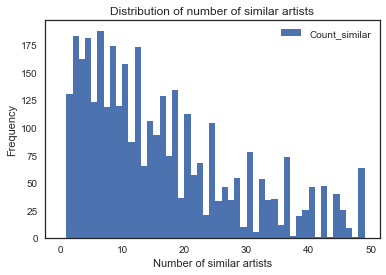

In [64]:
# Count the number of artists for all similarity lists
df_sim_count = df_sim_hot.groupby('artist_name').count()
df_sim_count = df_sim_count.drop('similar', 1)
df_sim_count.columns = ['Count_similar']

# Focus only on the artists with under 50 similar artists
bin_range = list(range(0, 50))
# Plot the distribution of counts
df_sim_count.plot.hist(bins=bin_range)
plt.xlabel('Number of similar artists')
plt.title('Distribution of number of similar artists')
plt.show()

It is interesting to note that no artist has no similar other artist. However most of them have under 30 similar artists.  

We now want to look the top 10 artists which are in the most similar lists.

In [65]:
# Merge the additional similarity data with our main data according to the pointing similar artists
df_sim_top = df_similarity.merge(df.ix[:, ['artist_id', 'artist_name']], left_on='similar', right_on='artist_id')
df_sim_top = df_sim_top.drop('artist_id', 1)
df_sim_top.head()

,target,similar,artist_name
0,AR009211187B989185,ARHINI31187B995C1D,Singing Melody
1,AR009211187B989185,ARHINI31187B995C1D,Singing Melody
2,AR009211187B989185,ARHINI31187B995C1D,Singing Melody Feat. Robyn
3,AR009211187B989185,ARHINI31187B995C1D,Singing Melody
4,AR009211187B989185,ARHINI31187B995C1D,Singing Melody


In [66]:
# Display the top 10 artists with the most references in similar lists
df_sim_top = df_sim_top.groupby('artist_name').count().sort_values('target', ascending=False).drop('target', 1)
df_sim_top[:10]

,similar
artist_name,
The Rolling Stones,1144
Sugar Minott,636
Stevie Ray Vaughan And Double Trouble,600
Radiohead,594
Sex Pistols,512
Van Halen,477
Hank Locklin,468
RUN-DMC,440
EPMD,400


It is interesting to note that the similarity lists, indeed if we look at the top 10 of length in similar lists, we do not obtain the same results which shows that similarities are indeed directed:

In [67]:
# Display the top 10 artists with the longest similar list
df_sim_count.sort_values('Count_similar', ascending=False)[:10]

,Count_similar
artist_name,
Bill & Gloria Gaither,334
Hank Locklin,306
Mario Rosenstock,299
Skeeter Davis,297
Aerosmith,288
Red Hot Chili Peppers,270
Tony Joe White,264
Jimmy Riley,252
Sugar Minott,252


### To go further: PageRank for artists

Because the previous analysis might not lead to the most influencial artists, we could create a directed graph with each artist being a node and we would add one edge when one artist is similar to another one. We would then follow the PageRank Algorithm as follows:
$$ I(A) = (1-d) + d (I(A1)/S(A1) + ... + I(An)/S(An)) $$
where:
- I(A) is the Influence of artist A,
- I(Ai) is the Influence of artist Ai which link to artist A,
- S(Ai) is the number of outbound links on artist Ai, i.e. the number of similar artist of Ai
- d is a damping factor which can be set between 0 and 1.

# Milestone 3: What comes next?

We would like to focus on how music defined itself accross time  and see its evolution. Hopefully we can also understand better how it moved around the world and discover how trends emerged and expanded. As we noticed we don't have a lot of music to study in the early years so we are considering focusing our next milestones on the evolution of music from 1970s. We also plan on using the whole dataset with spark to get a more statistically relevant analysis. 